# Dynamic Programming and Structural Econometrics #4

### Multidimensional Numerical Integration: Monte Carlo and Quadrature

**Readings:** 
- 📖 Judd, K. L. (1998). Numerical methods in economics. MIT press. Sections 7.1-7.5, 8.2
(https://www.princeton.edu/~deaton/downloads/Saving_and_Liquidity_Constraints.pdf))

by Bertel Schjerning

University of Copenhagen


### This Lecture: Multidimensional integration
$$
\int \cdots \int f(x_1,\cdots, x_d) g(x_1,\cdots, x_d) dx_1 \cdots dx_d
$$

1. Multidimensional Quadrature (product rule) $\rightarrow$ curse of dimensionality
1. Monte Carlo $\rightarrow$ breaks curse of dimensionality
1. Sampling from a multivariate distributions (leading example: normal and log-normal)
1. Dependency for random grids in higher dimensions (compare random, sobol and halton)
1. Illustrate that MC breaks curse of dimensionality (root n convergence) 
1. Compare MC with sparse grid for test problems
1. Compare methods on test problems with varying dimensionality
1. Applications: Port-folio choice model (Static) 



### Multidimensional quadrature

Much more complication, simple methods are subject to **curse of dimensionality**

- Generic product rule for quadrature

$$
\int_{[a,b]^d}f(x)dx \approx \sum_{i_1=1}^n \dots\sum_{i_d=1}^n \omega_{i_1}^1\dots\omega_{i_d}^d f(x_{i_1}^1,\dots,x^d_{i_d})
$$

- Product rule for Gaussian quadrature is based on a full tensor product of orthogonal polynomials  
- Sparse girds: Smolyaks algorithm 
- Monte Carlo integration!  

### Product rule subject to curse of dimensionality

In [1]:
n=2 # number of gridpoints in each dimension
print('%-10s%15s' % ('d', '# of nodes'))
for d in range(1, 10): print("%-10d%15g" % (d, n**d))
d=10; print("%-10d%15g" % (d, n**d))
d=20; print("%-10d%15g" % (d, n**d))
d=30; print("%-10d%15g" % (d, n**d))
d=50; print("%-10d%15g" % (d, n**d))

d              # of nodes
1                       2
2                       4
3                       8
4                      16
5                      32
6                      64
7                     128
8                     256
9                     512
10                   1024
20            1.04858e+06
30            1.07374e+09
50             1.1259e+15


### Monte Carlo
Addresses the computation of a multidimensional definite integral

$$
I_f
=\int _{\Omega}f(\mathbf{x})g(\mathbf{x})\,d\mathbf{x}
=E[f(\mathbf{x})]
$$

where $g(\mathbf{x})$ is the density for $d$-dimensional random variable $\mathbf{x}$ with support $\Omega$. 

In the special case where $\mathbf{x}$ uniformly distributed on $\Omega=[0,1]^d$ we have

$$I_f
=\int _{[0,1]^d}f(\mathbf{x})\,d\mathbf{x}
$$

### Monte Carlo integration is simple
1. sample $N$ points $\mathbf{x}_1,\cdots,\mathbf{x}_N$ from $g(\mathbf{x})$ 
1. approximate the mean $E[f(\mathbf{x}])$ by the sample average

$$
I\approx Q_{N}\equiv {\frac  {1}{N}}\sum _{{i=1}}^{N}f(\mathbf  {x}_{i})
$$

### Monte Carlo breaks the Curse of dimensionality

$\textbf{Consistency}$: Law of large numbers ensures that the sample average converge to the mean

$$\lim _{{N\to \infty }}Q_{N}
=\lim _{{N\to \infty }}{\frac  {1}{N}}\sum _{{i=1}}^{N}f(\mathbf{x}_{i})
=E[f(\mathbf{x})]
=I_f$$

$\textbf{Asymptotic Normality}$ : By the central limit theorem we have
$$
\sqrt{N}\left(Q_N-I_f \right)\ \xrightarrow {d} \ N\left(0,\sigma ^{2}\right)
$$
where $\sigma= \operatorname {Var}[f(\mathbf{x})]$ does not depend on $N$ and $d$

So that the standard error of $Q_N$ 
$$\sigma_{Q_N}=\frac{{\sigma}}{\sqrt{N}}$$ 
decreases with the standard parametric rate, $1/\sqrt{N}$

- The result that $\sigma_{Q_N}$ decreases with $1/\sqrt{N}$ and $\sigma ^{2}$ does NOT depend on the number of dimensions of the integral! 

- This is a huge advantage of Monte Carlo integration compared to most deterministic methods that depend exponentially on the dimension.




### Some random generators in Python

Modules:
- Random - basic functionality, scalar numbers
- NumPy.random - vectorized, many distributions
- SciPy.stats - more probability and statistics functions
- chaospy - advanced Monte Carlo integration 
(random, Hammersley, Halton, Sobol, Regular, Chebyshev, ...)

Installation of chaospy should be straight forward from terminal:

`pip install chaospy`


### Most of what we do today relies on these libraries

In [2]:
import numpy as np
import random
import scipy.stats
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
# !pip install chaospy # uncomment to install
import chaospy  ## needs installation


### Need this function to plot some distributions

In [3]:
def hist(data,bins='auto',range=None,theoretical=None,cdf=False):
    '''Draws histogram of data, imposes a theoretical distribution if given'''
    fig, ax = plt.subplots(figsize=(8,5))
    if cdf:  # plot CDF instead of histogram
        plt.hist(data,bins=len(data),range=range,cumulative=True,density=True,align='right',histtype='step',color='black')
    else:
        plt.hist(data,bins=bins,range=range,density=True,histtype='bar',color='lightgrey',edgecolor='k')
    if theoretical and len(data)>0:  # add theoretical distribution
        x = (np.linspace(range[0],range[-1],100) if range else np.linspace(min(data),max(data),100))
        y = theoretical(x)
        plt.plot(x,y,'r-')        

### Let's start simple: Sample from the uniform distribution

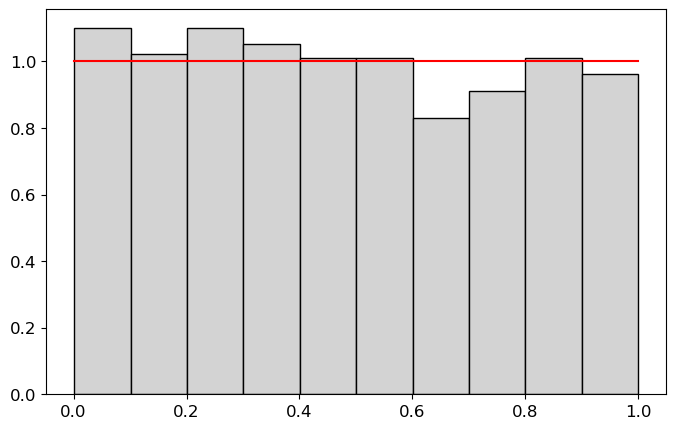

In [4]:
N=1000
x = np.random.random(N) #NumPy
hist(x,bins=10, theoretical=scipy.stats.uniform.pdf)

### Other distributions

- Normal  
- Log-normal  
- Exponential  
- Fisher  
- $ \chi^2 $-distribution  


and many other

[https://docs.scipy.org/doc/numpy/reference/routines.random.html] <br/>
[https://chaospy.readthedocs.io/en/master/distributions/index.html]


### Simulate from log-normal 

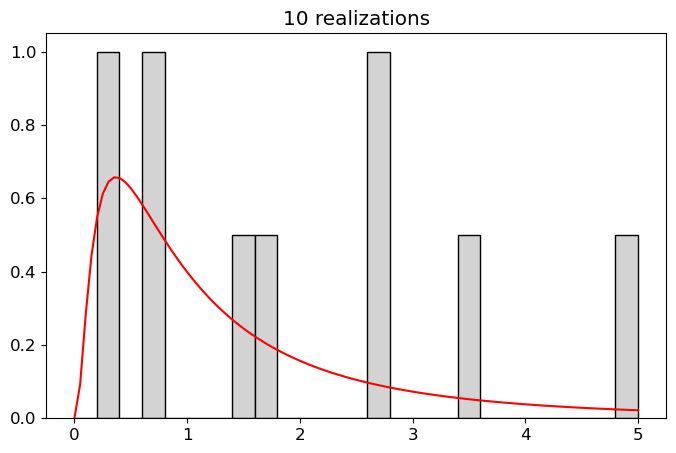

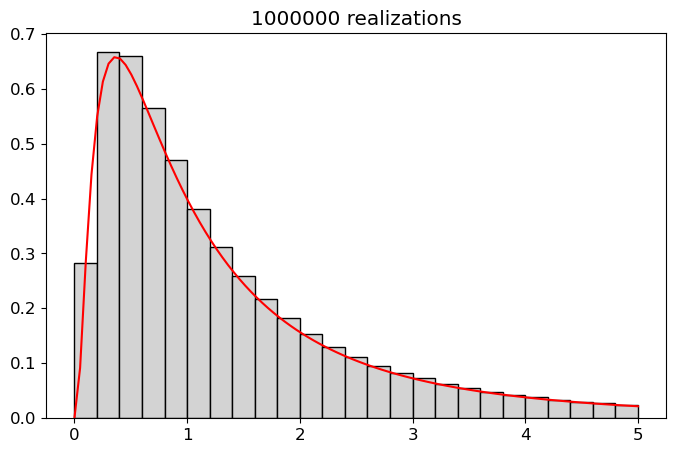

In [5]:
# simulate from log-normal 
for n in [10, 10**6]:
    x_sim = np.random.lognormal(size=n)
    hist(x_sim,bins=25,range=(0,5),theoretical=lambda x: scipy.stats.lognorm.pdf(x,loc=0, s=1.0))
    plt.title('%d realizations'%n)

### Inverse transform sampling
- Simulating from distribution based on uniform random numbers

- Let $ F(x) $ be cdf of the random variable of interest
$ X $, with inverse $ x=F^{(-1)}(u) $

- To simulate $ X $:
    1. simulate $ (u_1,\dots,u_n) $ from standard uniform distribution  
    1. return $ \big( F^{(-1)}(u_1),\dots,F^{(-1)}(u_n) \big) $  

$$
X = F^{(-1)}(U)
$$

$$
P(\{X \le x \}) = P(\{ F^{(-1)}(U) \le x \}) =
$$

$$
= P(\{ U \le F(x) \}) = F_U \big(F(x)\big) = F(x)
$$

### Inverse CDF

<center><img src="img/invcdf.png" style="width:800px;">

## Examples
### Normal distribution
$$
u=F(x) = \Phi \big(\frac{x-\mu}{\sigma}  \big)
$$

$$
x=F^{-1}(u) =(\mu + \sigma \Phi^{-1}(u))
$$

### Log-normal distribution
$$
u=F(x) = \Phi \big(\frac{\ln(x)-\mu}{\sigma}  \big)
$$

$$
x=F^{-1}(u) =\exp(\mu + \sigma \Phi^{-1}(u))
$$

###  Gumbel distribution
$$
u=F(x) = \exp \big( -\exp (-\frac{x-\mu}{\beta} ) \big)
$$

$$
x=F^{-1}(u) = \mu - \beta \ln( -\ln(u))
$$




### Simulate from log-normal using inverse transform sampling

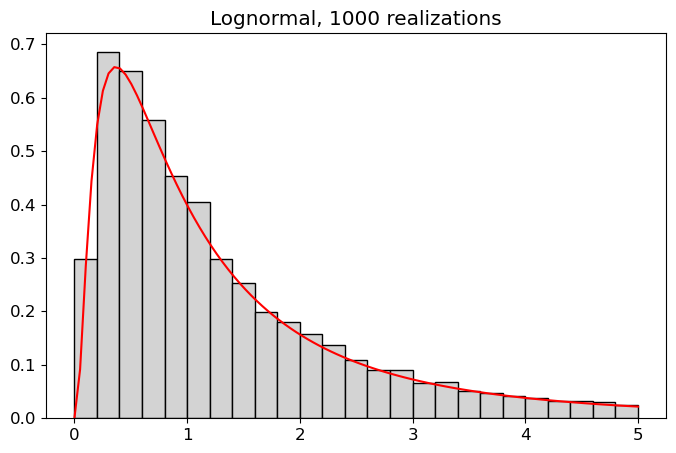

In [6]:
def lognormal(n=1000, μ=0, σ=0.5): # simulate x as log normal such that ln(x) ~ N(mu, sigma)
    u = np.random.random(size=n)   # simulate uniform draws  
     # transform uniform draws to lig normal draws based in inverse cdf of log-normal     
    return np.exp(μ+ σ*scipy.stats.norm.ppf(u));
n=10000; σ=1; μ=0 # note that scipy parameterizes log-normal differerentby shifting with so not equivalent unless μ=0  
x = lognormal(n, μ, σ)
hist(x,bins=25,range=(0,5),theoretical=lambda x: scipy.stats.lognorm.pdf(x, s=σ))
plt.title('Lognormal, %d realizations'%N);

### Repeatability of simulations

Sometimes it is important to be able to repeat the simulation’s random
number sequence
- **get_state()**
- **set_state()**
- **seed()**

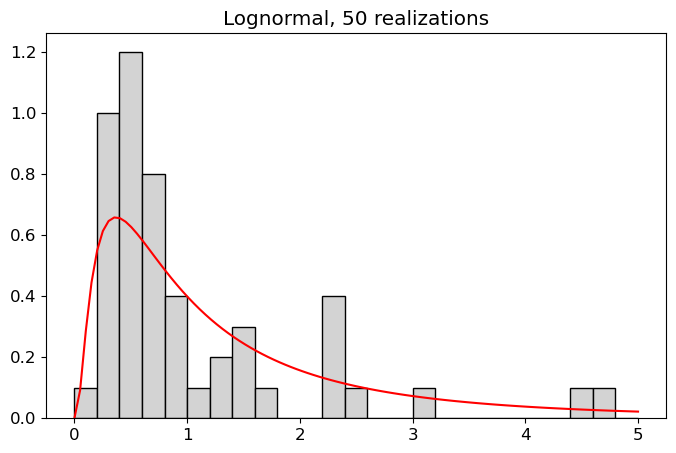

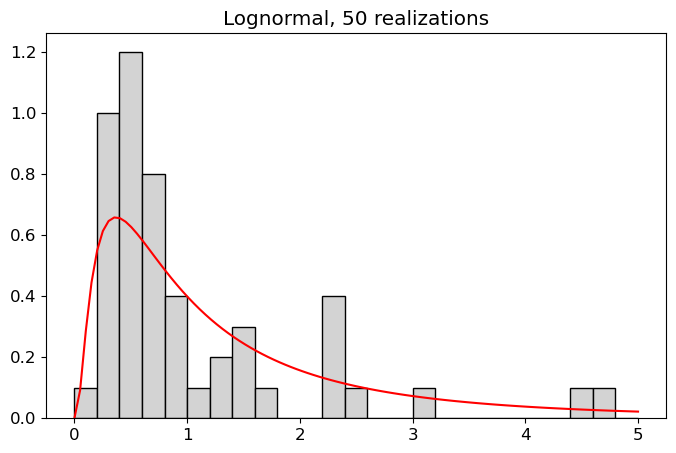

In [7]:
# Draw log-normals with fixed seed
σ=1; 
N=50;
st = np.random.get_state()
for i in range(2):    
    np.random.set_state(st) # uncomment to set state to st to use fixed for both graphs (varies from call to call)
    np.random.seed(2008)  # uncomment to use fixed seed in both graphs for all calls
    x = lognormal(n=N, μ=0, σ=σ)
    hist(x,bins=25,range=(0,5),theoretical=lambda x: scipy.stats.lognorm.pdf(x,s=σ))
    plt.title('Lognormal, %d realizations'%N);

### Random draws, systematic draws and variance reduction techniques
- **Independent random draws**: possible that the draws will be clumped together, with no draws from large areas of the domain.  
- **Halton draws** - good coverage in low dimensions... but tend to create artificial correlations in higher dimnensions
- **Sobol draws** - Sobol sequence seems better than Halton sequences except from the first dimensions.
- **antithetics** - improve converage by creating negative correlation between draws by mirroring draws



- Monte Carlo using **random draws** converge at a rate, ${\frac  {1}{{\sqrt  {N}}}}$

- Monte Carlo using **pseudo random draws** converge at a rate, ${\frac{(\log N)^{d}}{N}}$


### Function for plot quadrature nodes and uniform (pseudo) random draws

In [8]:
def plot_draws(n=20, d=2, transform=None, print_out=False, 
               rules=['legendre_tensor', 'legendre_sparse', "random", "halton", "sobol"], dims=(1,2)):
    fig, ax = plt.subplots(1,len(rules),figsize=(20,4))
    for idx, rule in enumerate(rules):
        
        d=max(max(dims),d)
        
        distribution = chaospy.Iid(chaospy.Uniform(0, 1), d)
        if rule=='legendre_tensor':  # legendre nodes on [a,b] interval
            order=int(n**(1/d))-1
            x, w = chaospy.generate_quadrature(order, distribution, rule=("legendre"), sparse=False)
        elif rule=='legendre_sparse':  # legendre nodes on [a,b] interval
            order=int(n**(1/d))-1
            x, w = chaospy.generate_quadrature(order, distribution, rule=("legendre"), sparse=True)
        else:  # take random draws (dxN)
            order=n
            x=chaospy.generate_samples(n, domain=d, rule=rule)  # take random draws (dxN)
            w=np.array(1/x.shape[1])

        if transform:
            x = transform(x);

        # figure title
        fig.suptitle('Dimensions ' + str(dims[0]) + ' and ' + str(dims[1]))

        # Show samples as 2-dimensional scatter plot
        ax[idx].scatter(x[dims[0]-1,:], x[dims[1]-1,:], marker=".", color="b", s=5)

        # Add labels and title
        ax[idx].set_xlabel("dimension " + str(dims[0]))
        ax[idx].set_ylabel("dimension " + str(dims[1])) if not idx else None
        ax[idx].set_aspect("equal")
        ax[idx].title.set_text(rule)
        if print_out: 
            print('dim(x)=%3d' %d, 'order= %-5d' % order, 'N== %-5d' % x.shape[1], ', rule=', rule)

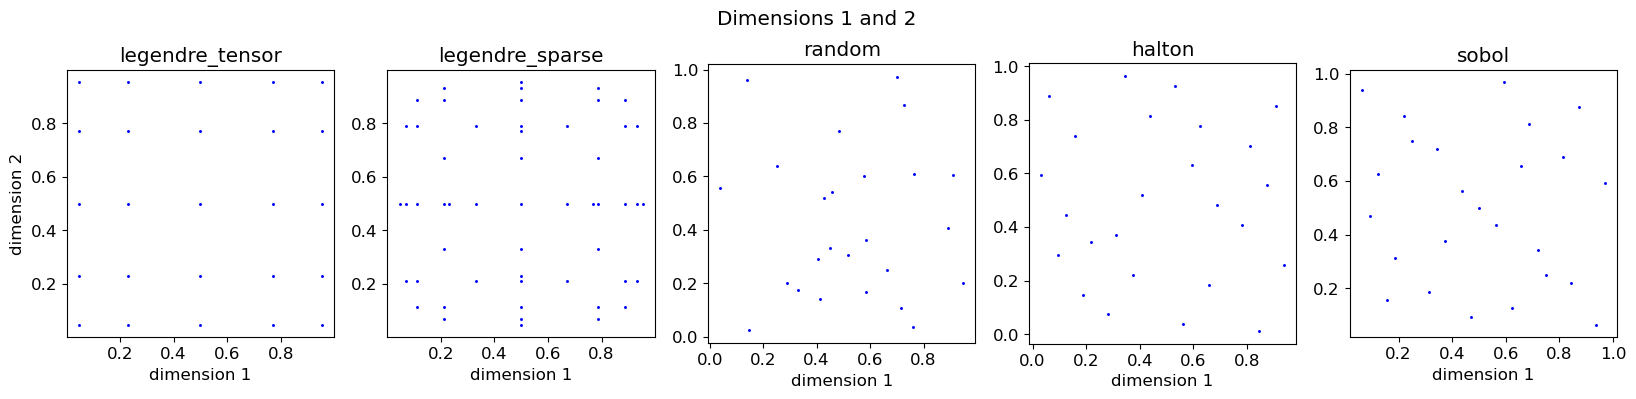

In [9]:
plot_draws(n=5**2)

### Drawing from mutivariate normals
Consider a multivariate normal distrubution $N(\mu,\Sigma)$ where $\mu=(\mu_1,\cdots, \mu_d)'$ is a $d \times 1$ vector of means and $\Sigma$ is the $d \times d$ covariance matrix 

A $d \times N$ vector of draws $\epsilon \sim N(\mu,\Sigma)$ is obtained as follows:
1. Compute the lower triangular Cholesky matrix $L$ defined such that $LL' = \Sigma$
1. Generate $d \times N$ matrix $u$ with iid. draws from the uniform distribution, $U(0,1)$  
1. Transform $u$ by computing $\eta=\Phi^{-1}(u)$ using the inverse cdf from the standard normal 
1. Calculate $\epsilon = \mu + L\eta$ 

We can verify the properties of $\epsilon$:
- It is normally distributed, since the sum of normals is normal.
- It mean is $\mu$: $E(\epsilon) = \mu + LE(\eta) = \mu$. 
- It variance is $\Sigma$: $Var(\epsilon) =L Var(\eta)L' =LL' = \Sigma$ 

### Build $\Sigma_{d \times d}$ with constant variance $\sigma^2/d $ and pairwise correlation $c$

In [10]:
def build_sigma(d=2, σ = 1, c=0, print_out=False): 
    '''build d-dimensional (dxd) covariance matrix with correlation c between variables'''
    if (c<0.0) and not (d==2):
        raise RuntimeError('build_sigma can only create negaive correlation for d=2')
        
    σ = σ/np.sqrt(d) * np.ones((d,1))             # vector of standard dev. (divide by sqrt(d) to keep std of sum constant)
    corr=(1-c)*np.identity(d) + c*np.ones((d,d)); # correlation martrix    
    Σ=σ*corr*σ.T                                  # variance-covariance martrix with correlation as in corr
    L=np.linalg.cholesky(Σ)                       # Lower triangular cholesky matrix, with property: L @ L.T=sigma2 (i.e. "square root" of matrix)
    if print_out:
        print('Correlation matrix\n',   corr.round(4))
        print('Covariance matrix\n',  Σ.round(4))
        print('Cholesky matrix, L\n',   L.round(4))    
    return Σ

Σ = build_sigma(d=4, σ = 1, c=0.5, print_out=True)

Correlation matrix
 [[1.  0.5 0.5 0.5]
 [0.5 1.  0.5 0.5]
 [0.5 0.5 1.  0.5]
 [0.5 0.5 0.5 1. ]]
Covariance matrix
 [[0.25  0.125 0.125 0.125]
 [0.125 0.25  0.125 0.125]
 [0.125 0.125 0.25  0.125]
 [0.125 0.125 0.125 0.25 ]]
Cholesky matrix, L
 [[0.5    0.     0.     0.    ]
 [0.25   0.433  0.     0.    ]
 [0.25   0.1443 0.4082 0.    ]
 [0.25   0.1443 0.1021 0.3953]]


### Transforming uniform draws to mutivariate normal distribution, $x \sim N(\mu, \Sigma)$

In [11]:
def inv_multnorm(u, μ, Σ): 
    L=np.linalg.cholesky(Σ)  # Lower triangular cholesky matrix L@L.T=Σ (i.e. "square root" of Σ)
    return μ + L @ scipy.stats.norm.ppf(u); # transform uniform to mutivariate normal 

d=3;      # dimension of x
N=10000   # number of samples
Σ = build_sigma(d, σ = 1, c=.5, print_out=True) # Variance-covariance matrix
u=np.random.random(size=(d,N)) # Generate uniform samples, u ~ U[0,1]
x=inv_multnorm(u, μ=1, Σ=Σ)       # Transform u to multivarite Normal with x~N(μ, Σ)
print('Covariance matrix (simulated data)\n', np.cov(x))

Correlation matrix
 [[1.  0.5 0.5]
 [0.5 1.  0.5]
 [0.5 0.5 1. ]]
Covariance matrix
 [[0.3333 0.1667 0.1667]
 [0.1667 0.3333 0.1667]
 [0.1667 0.1667 0.3333]]
Cholesky matrix, L
 [[0.5774 0.     0.    ]
 [0.2887 0.5    0.    ]
 [0.2887 0.1667 0.4714]]
Covariance matrix (simulated data)
 [[0.32956697 0.16390706 0.15943241]
 [0.16390706 0.32836878 0.15867979]
 [0.15943241 0.15867979 0.32367632]]


### Monte Carlo provide better coverage for high dimensional problems 

dim(x)=  5 order= 4     N== 3125  , rule= legendre_tensor
dim(x)=  5 order= 4     N== 781   , rule= legendre_sparse
dim(x)=  5 order= 3125  N== 3125  , rule= random
dim(x)=  5 order= 3125  N== 3125  , rule= halton
dim(x)=  5 order= 3125  N== 3125  , rule= sobol


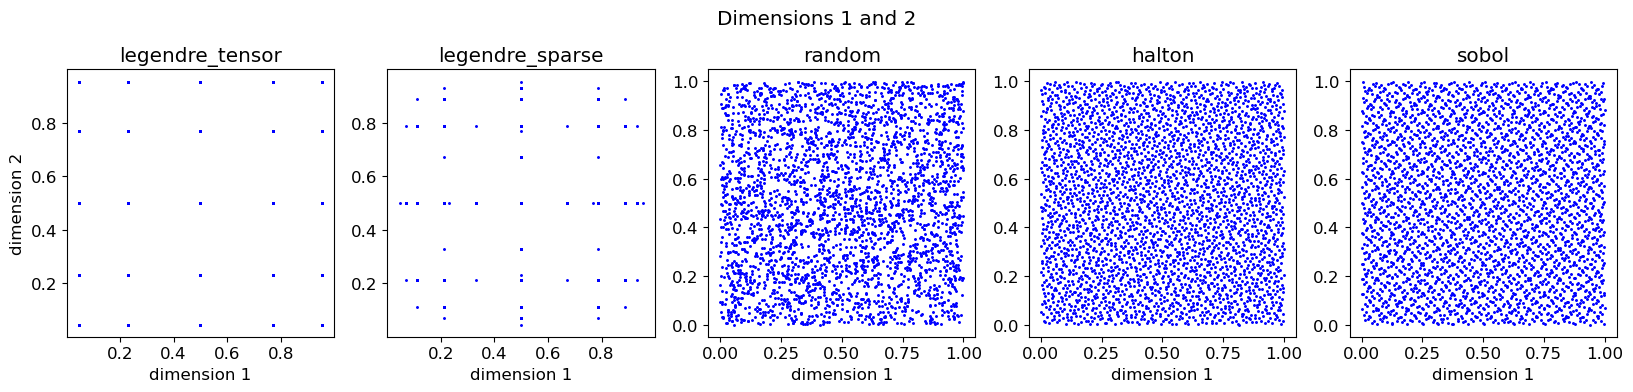

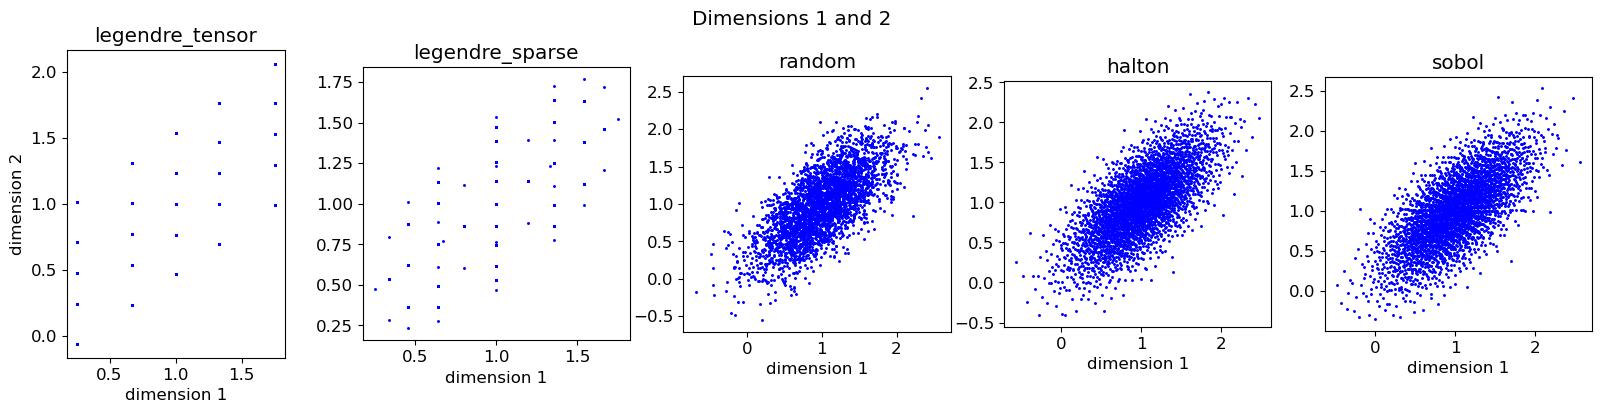

In [12]:
d=5; n=5**d;      # make sure n is not to large, try d = 2 and 5
# d=20;  n=2**d;  # make sure n is not to large, try d= 10-20
c=.7             # try changing c (negative correlation only works for d=2)
Σ = build_sigma(d, σ = 1, c=c, print_out=False) # build variance-covariance matrix
plot_draws(n, d, dims=(1,2), print_out=True)
plot_draws(n, d, dims=(1,2), transform = lambda u: inv_multnorm(u, μ=1, Σ=Σ))

### Some pseudo random grids have problems with correlation in higher dimensions

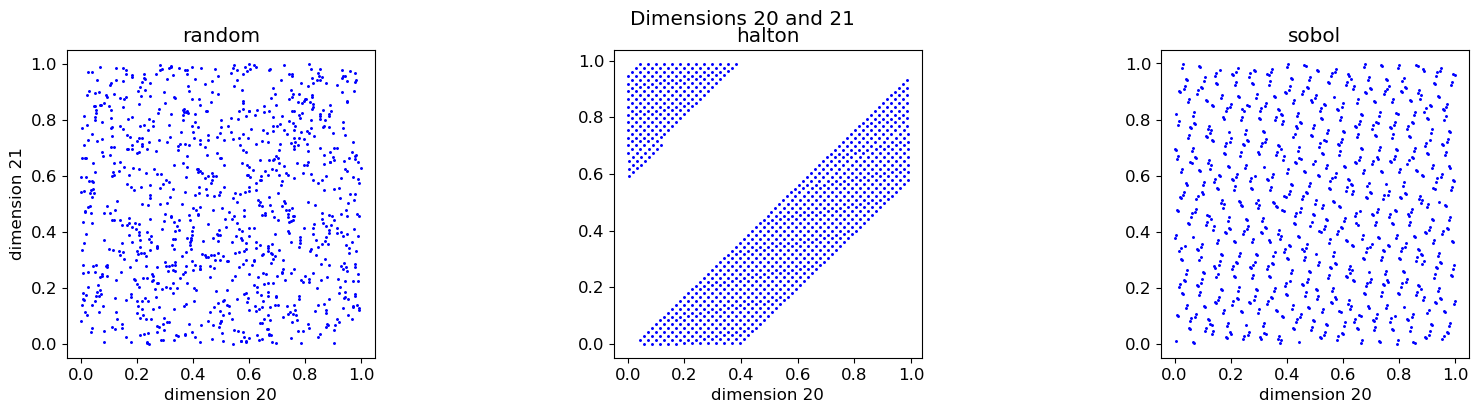

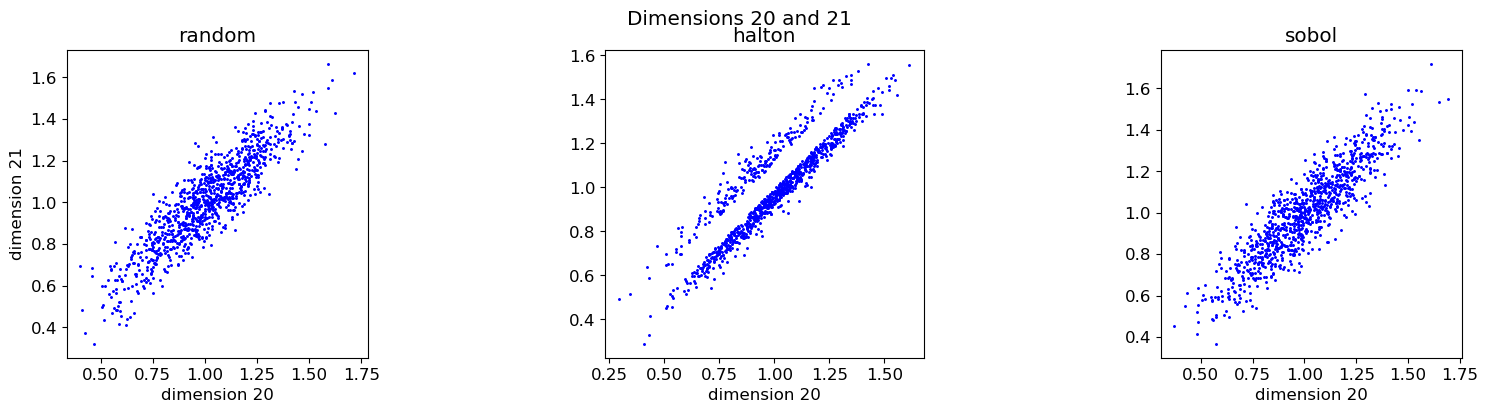

In [13]:
d=21 # try 2, 21, 100 and 200
n=1000;
Σ = build_sigma(d, σ = 1, c=.9, print_out=False) # build variance-covariance matrix
plot_draws(n, d, dims=(d-1,d), rules=["random", "halton", "sobol"])
plot_draws(n, d, dims=(d-1,d), transform=lambda u: inv_multnorm(u, μ=1, Σ=Σ), rules=["random", "halton", "sobol"])

### Let's do some Legendre quadrature using chaospy : Solve $\int_a^b 1/d \sum_{i=1}^d x_i^m dx_1,\dots,dx_d$

In [14]:
def gauss_legendre(f, order=5, d=1, a=0, b=1, sparse=False, output=False, true_val=None):
    '''Compute the integral on [a, b]^d using gaussian quadrature with sample size N'''
    distribution = chaospy.Iid(chaospy.Uniform(0, 1), d)
    x0, w0 = chaospy.generate_quadrature(order, distribution, 'legendre', sparse)
    x=(b-a)*x0+a      # adjust to interval [a, b]
    fx=f(x)           # evaluate f(x) adjusted to interval [a, b]
    Qn = np.sum((b-a)*fx*w0) # quadrture rule 
    
    if output == True:         
        if not sparse: print('Using Legendre nodes with (d,N,order)=(%d,%d,%d) based on tensor product'%(x.shape[0],x.shape[1], order))
        if sparse: print('Using Legendre nodes with (d,N,order)=(%d,%d,%d) based on sparse Smolyack grid '%(x.shape[0],x.shape[1], order))
        if true_val!=None:  
            print('%-15s%20s%20s' % ('True value', 'Quadratre', 'Bias'))
            print('%-15g%20g%20g\n' % (true_val, Qn, (Qn-true_val)))
        else:
            print('%-15s%20s' % ('Estimate'))
            print('%-15g%20g\n' % (Qn.round(10)))
    return Qn
# We should be able to approximate an integral whose integrand can be perectly approximated 
# by a polynomial of degree m=2*(order+1)-1 
d=5 # Try d = 5-10
N=5**d                     # Total number of nodes in tensor grid
order=int((N-d)**(1/d))    # order that gives N nodes in tensor product basis
a=-1; b=2; m=9;            # try different number of draws N, number of dimensions d, and exponents m
f= lambda x: np.mean(x**m, axis=0);  # function to integrate from a to b
for sparse in [True, False]:
    Qn= gauss_legendre(f, order, d, a, b, sparse, output=True, true_val=1/(m+1)*(b**(m+1)-a**(m+1))) 

Using Legendre nodes with (d,N,order)=(5,781,4) based on sparse Smolyack grid 
True value                Quadratre                Bias
102.3                         102.3         3.97904e-13

Using Legendre nodes with (d,N,order)=(5,3125,4) based on tensor product
True value                Quadratre                Bias
102.3                         102.3        -3.12639e-13



### Let's kick start our MC: solve 1000 dimensional integral $\int_a^b 1/d \sum_{i=1}^d x_i^m dx_1,\dots,dx_d$

In [15]:
def mc_integral(f, N=1000, d=1, rule='random', a=0, b=1, output=False, true_val=None):
    '''Compute the integral on [a, b]^d using uniform Monte Carlo with sample size N'''
    # Generate a d x N matrix of uniform random (or quasi-random) numbers according to rule 
    x0=chaospy.generate_samples(order=N, domain=d, rule=rule) # rule can for example be "random", "halton", "sobol"
    x=(b-a)*x0+a      # adjust to interval [a, b]
    fx=(b-a)*f(x)     # evaluate f(x) adjusted to interval [a, b]
    Qn = np.sum(fx/N)            # estimate of integral
    se_Qn=np.std(fx)/np.sqrt(N)  # standard errors (only valid for rule == 'random' !!!!)
    if output == True:         
        print('Using (N,d)=(%d,%d) %s draws'%(N,d,rule))
        if true_val!=None:  
            print('%-15s%20s%20s%20s' % ('True value', 'Estimate', 'Bias', 'Std. error'))
            print('%-15g%20g%20g%20g\n' % (true_val, Qn, (Qn-true_val), se_Qn))
        else:
            print('%-15s%20s' % ('Estimate', 'Std. error'))
            print('%-15g%20g\n' % (Qn.round(10) , se_Qn.round(10)))
    return Qn, se_Qn

d=1000; N = 1000; a=-1; b=2; m=5;    # try different number of draws N, number of dimensions d, and exponents m
f= lambda x: np.mean(x**m, axis=0);  # function to integrate from a to b
for rule in ['random', 'halton', 'sobol']:
    if not (d>=1111 and rule=='sobol'): # sobol not available for d>=1111
        Qn, se_QN= mc_integral(f, N, d, rule, a, b, output=True, true_val=1/(m+1)*(b**(m+1)-a**(m+1)))

Using (N,d)=(1000,1000) random draws
True value                 Estimate                Bias          Std. error
10.5                         10.481          -0.0190361           0.0213484

Using (N,d)=(1000,1000) halton draws
True value                 Estimate                Bias          Std. error
10.5                        7.85107            -2.64893          0.00927102

Using (N,d)=(1000,1000) sobol draws
True value                 Estimate                Bias          Std. error
10.5                        10.4644          -0.0356154           0.0248321



### Let's compare quadrature and Monte Carlo (for d-dimensional integral)
$$
\int_{-\infty}^{\infty} \cdots \int_{-\infty}^{\infty} f(x_1,\cdots, x_d) g(x_1) \cdots g(x_d) dx_1 \cdots dx_d
$$
- **Test problem 1**: Compute integral of sum of d normal distributed variables  
$$
f(x)=f(x_1,\cdots, x_d)=\sum_{i=1}^d x_i
$$
and 
$g(x)$ is the density of the normal distribution with mean $\mu$ and variance $\sigma^2$

- **Test problem 2:** Compute integral of product of $d$ log-normal distribution, i.e. where
$$
f(x)=f(x_1,\cdots, x_d)=\Pi_{i=1}^d \exp(x_i)=\exp\left(\sum_{i=1}^d x_i\right)
$$




In [16]:
test1 = False;   # Set to True to do Test model 1, else do Test model 2
d=5; N=5**d;     # make sure N is not to large, try d = 2 and 5
# d=10;  N=2**d;  # make sure N is not to large, try d= 10-20
order=int((N-d)**(1/d))   # order that gives N nodes in tensor product basis
μ=1.0/d   # normalize μ with 1/d to hold mean of sum of x constant when d is increased
Σ = build_sigma(d, σ = 1, c=0.0) # build variance-covariance matrix

if test1: 
    f = lambda u: np.sum(inv_multnorm(u, μ=μ, Σ=Σ) , axis=0);   # Test problem 1 (product of d log-normals)
    true_val=np.array(μ)*d
else:
    f = lambda u: np.exp(np.sum(inv_multnorm(u, μ=μ, Σ=Σ) , axis=0)); # Test problem 2 (product of d log-normals)
    one=np.ones((d,1)) # vector of ones used in variance formula var(sum_d(x))=a.T@Σ@a
    true_val=np.array(np.exp(μ*d + one.T@Σ@one/2))

a=0;b=1;  # intergarte over support of uniform distribution               
Qn = gauss_legendre(f, order, d, a=a, b=b, sparse=True, output=True, true_val=true_val) 
Qn = gauss_legendre(f, order, d, a=a, b=b, sparse=False, output=True, true_val=true_val) 
for rule in ['random', 'halton', 'sobol']:
    Qn, se_QN= mc_integral(f, N, d, rule, a, b, output=True, true_val=true_val)

Using Legendre nodes with (d,N,order)=(5,781,4) based on sparse Smolyack grid 
True value                Quadratre                Bias
4.48169                      4.2541           -0.227586

Using Legendre nodes with (d,N,order)=(5,3125,4) based on tensor product
True value                Quadratre                Bias
4.48169                     4.29637           -0.185319

Using (N,d)=(3125,5) random draws
True value                 Estimate                Bias          Std. error
4.48169                     4.34174           -0.139953           0.0962302

Using (N,d)=(3125,5) halton draws
True value                 Estimate                Bias          Std. error
4.48169                     4.39316          -0.0885251           0.0933779

Using (N,d)=(3125,5) sobol draws
True value                 Estimate                Bias          Std. error
4.48169                     4.45224          -0.0294458            0.102351



### Recall Properties of Monte Carlo

$\textbf{Consistency}$: Law of large numbers ensures that the sample average converge to the mean

$$\lim _{{N\to \infty }}Q_{N}
=\lim _{{N\to \infty }}{\frac  {1}{N}}\sum _{{i=1}}^{N}f(\mathbf{x}_{i})
=E[f(\mathbf{x})]
=I_g$$

$\textbf{Asymptotic Normality}$ : By the central limit theorem we have
$$
\sqrt{N}\left(Q_N-I_f \right)\ \xrightarrow {d} \ N\left(0,\sigma ^{2}\right)
$$
where $\sigma= \operatorname {Var}[f(\mathbf{x})]$ does not depend on $N$

So that the standard error of $Q_N$ 
$$\sigma_{Q_N}=\frac{{\sigma}}{\sqrt{N}}$$ 
decreases with the standard parametric rate, $1/\sqrt{N}$

$\textbf{Standard errors}$: Given our estimate $Q_{N}$ of $I_g$, we can obtain an unbiased estimate of $\sigma^2= \operatorname {Var}[f(\mathbf{x})]$ and the standard error of $Q_N$ 
$$
{\hat{\sigma}^2_N}=\frac{1}{N-1}\sum _{i=1}^N (f(\mathbf{x}_{i})-Q_{N})^2
\quad \text{ and } \quad {\hat{\sigma}}_{Q_N}=\frac{{\hat{\sigma}}_N   }{\sqrt{N}}$$ 



### Monte Carlo Squared: Let's study the properties of the simulated integral using Monte Carlo

In [17]:
def MC_sqaured(f,  N=500,  # Number Monte Carlo samples for each estimate
                   S=1000, # Number Monte Carlo estimates of integral
                   rule='random', # can be random, halton, sobol (although standard errors only are valid for random)
               true_val=np.NaN, label='True Value', output=True): 
    Q_est=np.empty((S, 1)); Q_se=np.empty((S, 1));
    for i_s in range(S): # do the monte carlo of our monte carlo integral 
        Q_est[i_s, 0], Q_se[i_s,0]=mc_integral(f, N=N, d=d, rule=rule)
    if not true_val: 
        true_val=np.mean(Q_est);         
    Q_bias=Q_est-true_val

    # summary output
    if output: 
        hist(np.array(Q_est), bins=50, theoretical=lambda x: scipy.stats.norm.pdf(x, loc=true_val, scale=np.mean(Q_se)))
        plt.title('Monte Carlo distribution of estimates, true value of %s=%g'% (label, true_val))
        plt.show()        
        print('%-15s%20s%20s%20s%20s' % (label, 'E[estimate]', 'E[Bias]', 'E[Std. error]', 'Std. dev(bias)'))
        print('%-15g%20g%20g%20g%20g' % (true_val, np.mean(Q_est), np.mean(Q_bias), np.mean(Q_se), np.std(Q_est-true_val)))
    
    return Q_est, Q_se, Q_bias

###  Monte Carlo Distribution: Asymptotic Normal and unbiased

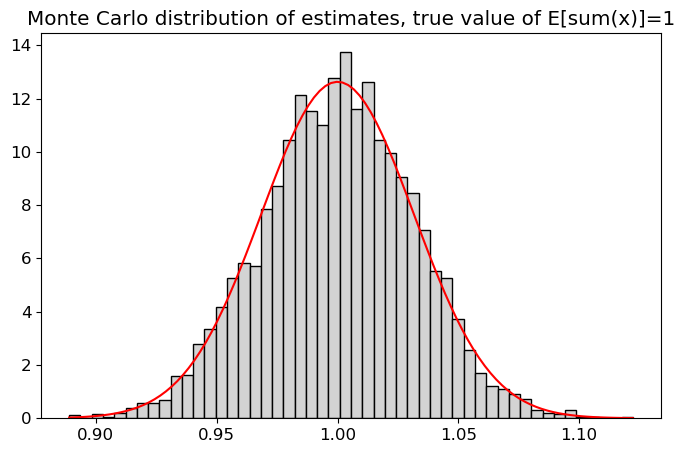

E[sum(x)]               E[estimate]             E[Bias]       E[Std. error]      Std. dev(bias)
1                           1.00022         0.000221687           0.0315918           0.0314417


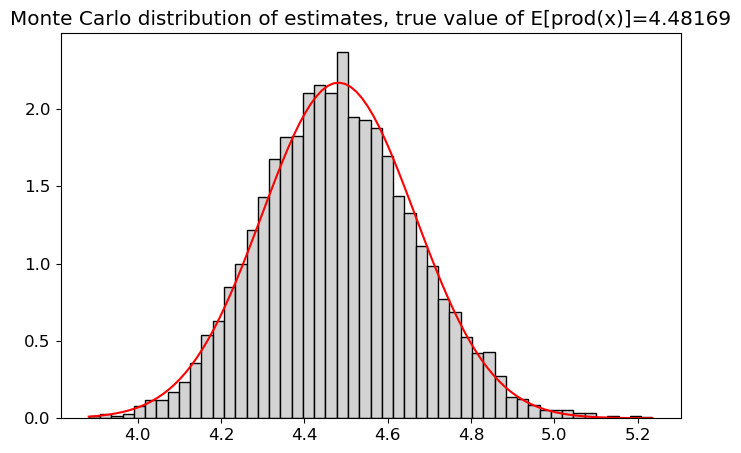

E[prod(x)]              E[estimate]             E[Bias]       E[Std. error]      Std. dev(bias)
4.48169                     4.48143        -0.000262133             0.18375            0.185675


In [18]:
N=1000;  # Number of Monte Carlo draws used to compute integral
d=5;     # Number of dimensions in log-normal
Σ = build_sigma(d, σ = 1, c=0.0, print_out=False) # build variance-covariance matrix
μ=1.0/d;
# Test problem 1 (sum of d normals)
f1 = lambda u: np.sum(inv_multnorm(u, μ, Σ=Σ) , axis=0);   
Q1_est, Q1_se, Q1_bias = MC_sqaured(f1, N, S=5000, label='E[sum(x)]', true_val=np.array(μ*d))

# Test problem 2 (product of d log-normals)
f2 = lambda u: np.exp(np.sum(inv_multnorm(u, μ=1.0/d, Σ=Σ) , axis=0)); 
one=np.ones((d,1)) # vector of ones used in variance formula var(sum_d(x))=a.T@Σ@a
Q2_est, Q2_se, Q2_bias = MC_sqaured(f2, N, S=5000, label='E[prod(x)]', true_val=np.array(np.exp(μ*d + one.T@Σ@one/2)))

### Rates of convergence
- Monte Carlo using random draws converge at a rate, ${\frac  {1}{{\sqrt  {N}}}}$
- Monte Carlo using pseudo random draws converge at a rate, ${\frac{(\log N)^{d}}{N}}$

- In order for $O\left({\frac{(\log N)^{d}}{N}}\right)$ to be smaller than $O\left({\frac  {1}{{\sqrt  {N}}}}\right)$, 
the dimension $d$ needs to be small and $N$ needs to be large (e.g. $N>2^{d})$
- Note the rates are not sharp, and these rate results is not informative of the size of the error for a given value of $N$

### Rates of convergence

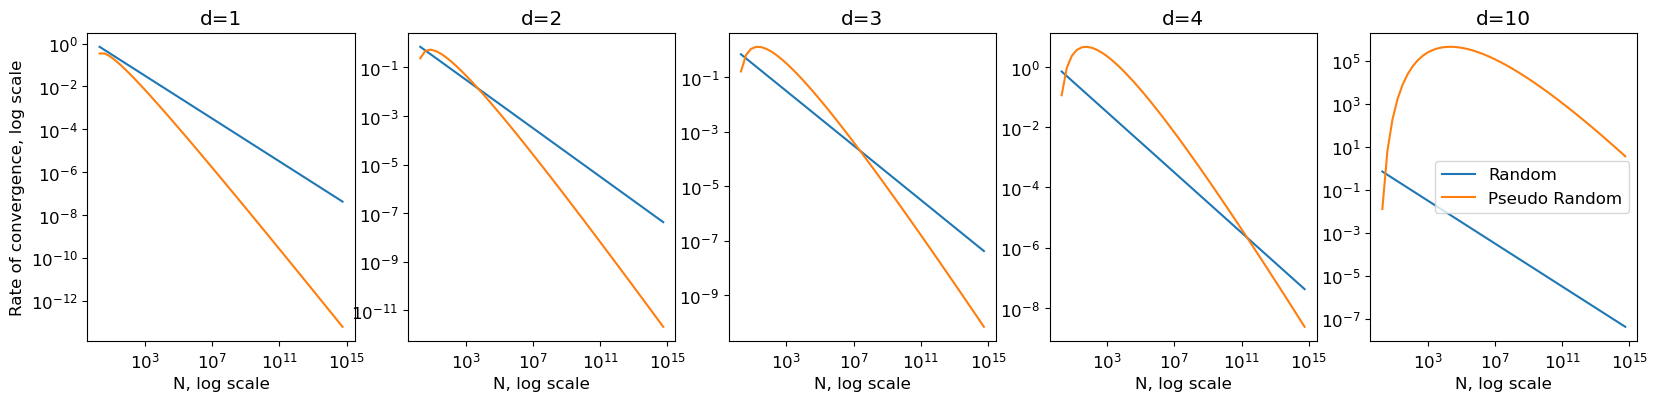

In [19]:
Nvec=2**np.arange(1, 50, 1);
fig, ax = plt.subplots(1,5,figsize=(20,4))
dlist=[1,2,3,4,10]
for i, d in enumerate(dlist):
    ax[i].plot(Nvec, 1/np.sqrt(Nvec), label='Random')
    ax[i].plot(Nvec, (np.log(Nvec)**d)/Nvec, label='Pseudo Random')
    ax[i].set_yscale('log'); ax[i].set_xscale('log'); ax[i].set_title('d=%d'%d)
    ax[i].set_xlabel("N, log scale")
    if i==0:
        ax[i].set_ylabel("Rate of convergence, log scale")
    plt.legend()
plt.show()

### Rates of convergence

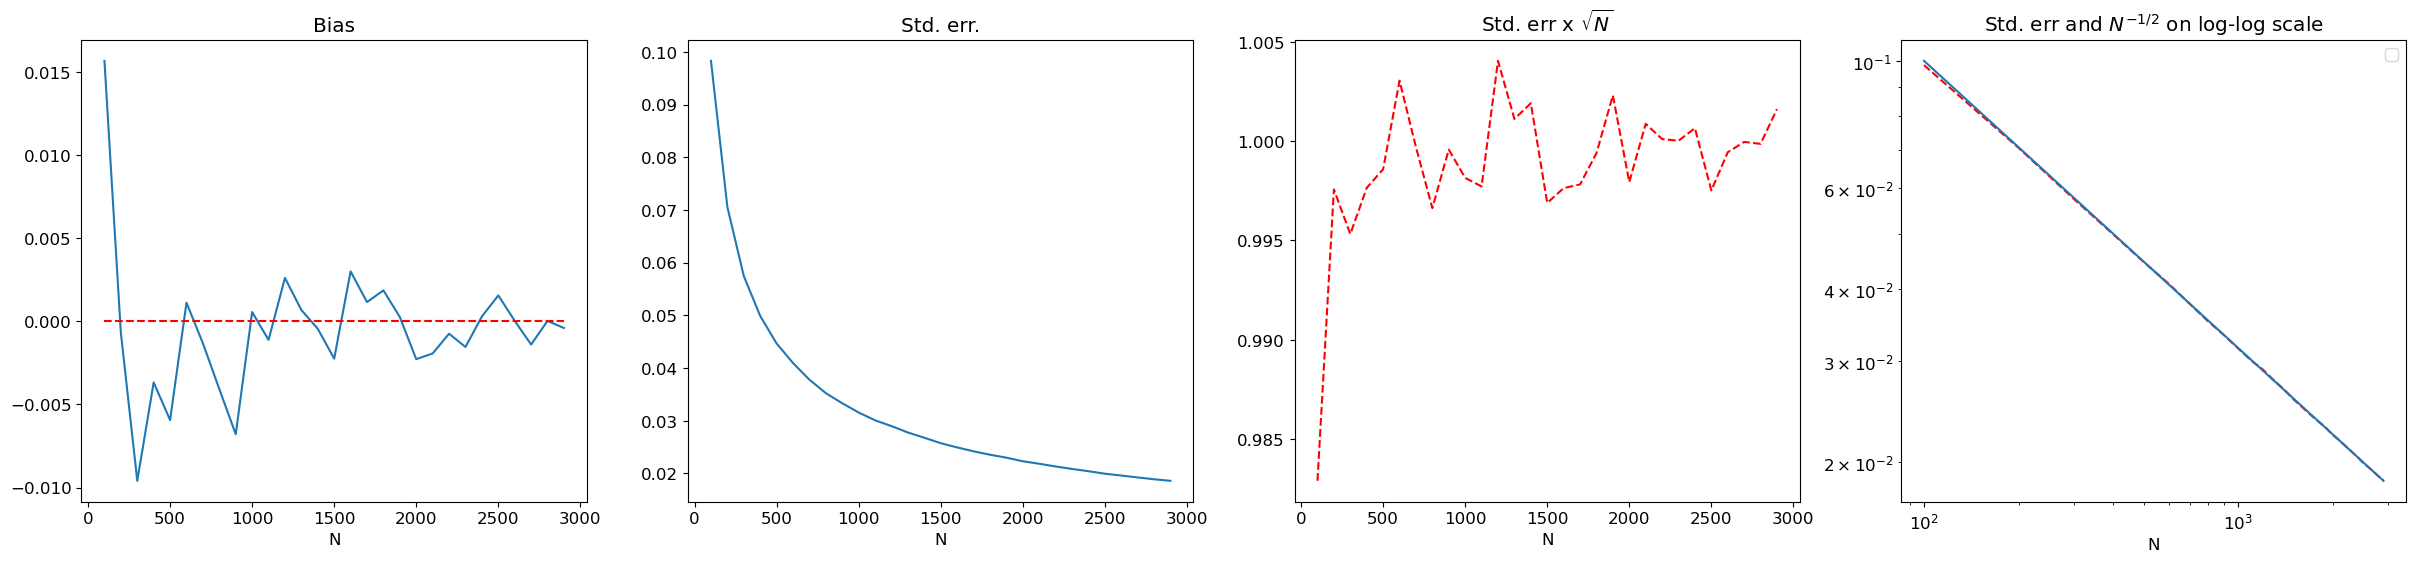

In [20]:
sampling_rule='random'          # Try random, sobold and halton
S=100                             # Number of monte carlo samples
Nvec=np.arange(100, 3000, 100); # Number of Monte Carlo draws used to compute integral
Σ = build_sigma(d, σ = 1, c=0.0, print_out=False) # build variance-covariance matrix
μ=1.0/d
f1 = lambda u: np.sum(inv_multnorm(u, μ, Σ=Σ) , axis=0);   # Test problem 1 (product of d log-normals)

Q_est=np.empty((S, len(Nvec))); Q_se=np.empty((S, len(Nvec))); Q_bias=np.empty((S, len(Nvec)))
for i, N in enumerate(Nvec):
    Q_est[:,[i]],Q_se[:,[i]],Q_bias[:,[i]]=\
    MC_sqaured(f1,N,S,sampling_rule, label='E[sum(x)]',true_val=np.array(μ)*d, output=False)

fig, ax = plt.subplots(1,4,figsize=(30,6))
for i in range(4): ax[i].set_xlabel("N")
ax[0].set_title('Bias'); ax[0].plot(Nvec, np.mean(Q_bias, axis=0)); ax[0].plot(Nvec, Nvec*0, '--r'); 
ax[1].set_title('Std. err.'); ax[1].plot(Nvec, np.mean(Q_se, axis=0)); 
ax[2].set_title('Std. err x $\sqrt{N}$'); ax[2].plot(Nvec,np.mean(Q_se, axis=0)*np.sqrt(Nvec), '--r'); 
ax[3].set_title('Std. err and $N^{-1/2}$ on log-log scale');
ax[3].plot(Nvec,np. mean(Q_se, axis=0), '--r'); ax[3].plot(Nvec, 1/np.sqrt(Nvec))
ax[3].set_yscale('log'); ax[3].set_xscale('log')

plt.legend()
plt.show()

## Some lessons from this lecture
The main advantages of Monte Carlo methods relative to quadrature methods for numerical integration are:
1. Monte Carlo breaks curse of dimentionality
    - Computational complexity of Quadrature Product rules increases exponentially with the dimensionality of the integral
    - Limiting properties (including rates of convergence) for Monte Carlo methods are less unffected by dimensionality.
    - Monte Carlo is more effective in higher dimensions

1. Monte Carlo methods are easy to implement 
1. Monte Carlo methods are more flexible 
    - Can handle a wider range of integrands, including those with singularities or discontinuities, whereas quadrature methods may struggle in such cases.
1. Monte Carlo methods provide error estimates
    - Monte Carlo methods provide a natural way to estimate the error in the numerical integration
    - Can be difficult to do with quadrature methods.
1. Monte Carlo methods can be more accurate 
    - Monte Carlo methods can be more accurate than quadrature methods for certain types of integrands, particularly those with high variability or low regularity.

However, 
1. Quadrature is usually the best you can do in small dimensional problems
1. Quadrature Methods can ameliorate the curse of dimensional when using sparse grids (Smolyak's algorithm)
 

## Further learning resources

- [https://docs.scipy.org/doc/scipy-0.14.0/reference/tutorial/integrate.html](https://docs.scipy.org/doc/scipy-0.14.0/reference/tutorial/integrate.html)  
- [https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.statistics.html](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.statistics.html)  
- Docs on **SciPy.random**
  [https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html)  
- Docs on **SciPy.stats**
  [https://docs.scipy.org/doc/scipy/reference/stats.html](https://docs.scipy.org/doc/scipy/reference/stats.html)  
- Docs on **Chaospy**
  [https://chaospy.readthedocs.io/en/master/](https://chaospy.readthedocs.io/en/master/)  
- Random number generators [https://www.random.org/analysis](https://www.random.org/analysis)  